<a href="https://colab.research.google.com/github/binesh-b0/Data_Science/blob/main/heart_disease_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**K-means clustering on UCI Heart disease dataset** <br>





In [ ]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from collections import Counter
from matplotlib import rcParams
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 load dataset <br>
 source :  https://archive.ics.uci.edu/ml/datasets/Heart+Disease

 Acknowledgements:


*   Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D
*   University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
*   University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
*   V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.







Data insights

---



In [ ]:
df = pd.read_csv('drive/My Drive/datasets/heart_disease_uci.csv')
df.head(5)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0




The dataset contains 16 attrbutes:

    id - patient identification number
    age - age in years of the patient
    sex - (1 = male; 0 = female)
    cp - chest pain type (typical angina, atypical angina, non-anginal pain,asymptomatic )
    dataset - place of study
    trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    chol - serum cholestoral in mg/dl
    fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    restecg - resting electrocardiographic results
    thalach - maximum heart rate achieved
    exang - exercise induced angina (1 = yes; 0 = no)
    oldpeak - ST depression induced by exercise relative to rest
    slope - the slope of the peak exercise ST segment
    ca - number of major vessels (0-3)
    thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
    num - have disease or not (1=yes, 0=no)



In [ ]:
df.shape

(920, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [ ]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


**Visualizations**

---



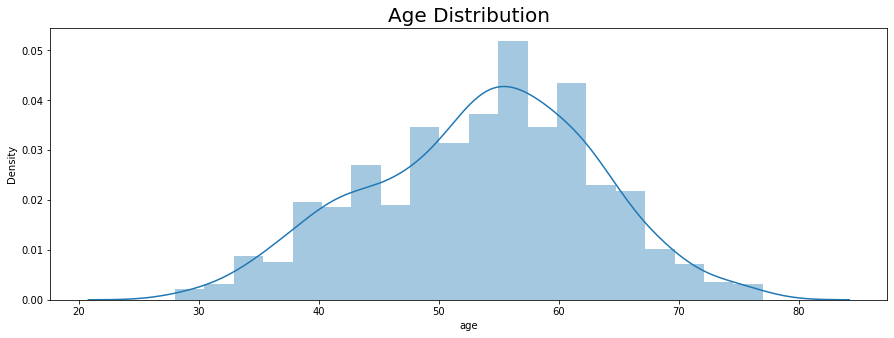

In [ ]:
# age distribution
plt.figure(figsize=(15,5))
plt.title('Age Distribution', fontsize=20)
sns.distplot(a=df['age'], kde=True, bins=20)

In [ ]:
df['sex'].value_counts()

Male      726
Female    194
Name: sex, dtype: int64

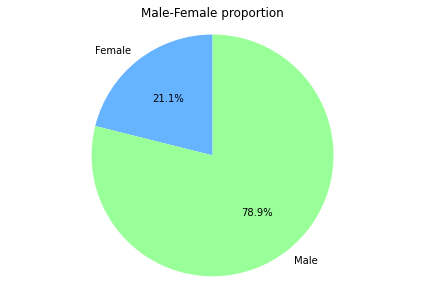

In [ ]:
# male/female proportion
colors = ['#66b3ff','#99ff99']

fig1, ax = plt.subplots()
ax.pie(df.groupby('sex').size(), colors = colors,labels=['Female','Male'], autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.tight_layout()
plt.title('Male-Female proportion')
plt.show()

In [ ]:
df['cp'].value_counts()

asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: cp, dtype: int64

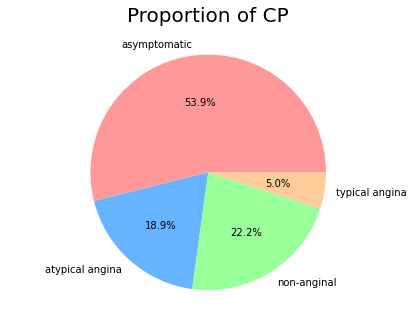

In [ ]:
#  Proportion of CP(Chest Pain Type)
fig1, ax = plt.subplots()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
ax.pie(df.groupby('cp').size(),colors=colors,labels=['asymptomatic','atypical angina','non-anginal','typical angina'], autopct='%1.1f%%')
ax.axis('equal')
plt.tight_layout()
plt.title('Proportion of CP',fontsize=20,pad=20)
plt.show()


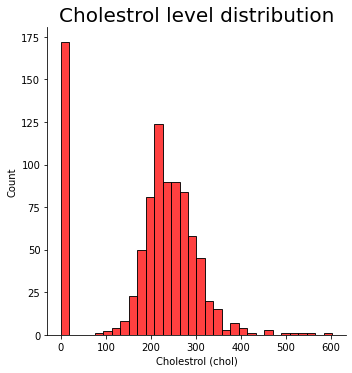

In [ ]:
sns.displot(df["chol"], color="r")
plt.title("Cholestrol level distribution", fontsize=20)
plt.xlabel("Cholestrol (chol)")
plt.show()

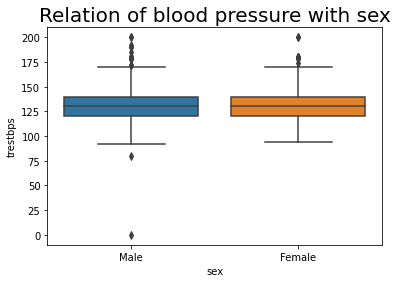

In [ ]:
# relation of trestbps with sex
sns.boxplot(df['sex'], df['trestbps'])
plt.title('Relation of blood pressure with sex', fontsize = 20)
plt.show()


In [ ]:
# making a copy of dataset
df_copy =df.copy()
df.head(5)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


**Preprocessing**

---



In [ ]:
# check for null values
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [ ]:
# dropping attributes that are not used in clustering
df.drop(['ca','slope','dataset','id','thal','num'],axis=1,inplace=True)

In [ ]:
# drop the null values
df.dropna(inplace = True)

In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
dtype: int64

In [ ]:
df.shape

(740, 10)

In [ ]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4


In [ ]:
# Converting categorical values to numeric values
from sklearn.preprocessing import StandardScaler, LabelEncoder
enc=LabelEncoder()
df.loc[:,['sex','cp','fbs','restecg','exang']] = df.loc[:,['sex','cp','fbs','restecg','exang']].apply(enc.fit_transform)

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3
1,67,1,0,160.0,286.0,0,0,108.0,1,1.5
2,67,1,0,120.0,229.0,0,0,129.0,1,2.6
3,37,1,2,130.0,250.0,0,1,187.0,0,3.5
4,41,0,1,130.0,204.0,0,0,172.0,0,1.4


In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [ ]:
# Scaling column values
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
x = df.values
x_scaled = StandardScaler().fit_transform(df.values)
X_norm = pd.DataFrame(x_scaled)

**K-Means clustering**

---



In [ ]:
# finding the optimal number of clusters using Elbow point method
distortions = []
K=range(1,10)
for k in K:
    kmeanModel=KMeans(n_clusters=k)
    kmeanModel.fit(x)
    distortions.append(sum(np.min(cdist(x,kmeanModel.cluster_centers_,'euclidean'),axis=1))/x.shape[0])

In [ ]:
distortions

[76.1318725197395,
 52.72655562733445,
 41.22099662626397,
 37.74423203335411,
 35.44550573313434,
 32.50618156254318,
 31.057259134230076,
 29.465081773526816,
 28.275557021821157]

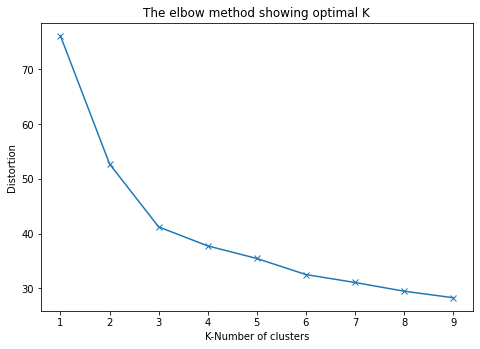

In [ ]:
#Plot
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.set_xticks(range(1,25))
ax.set_xlabel('K-Number of clusters')
ax.set_ylabel('Distortion')
ax.set_title('The elbow method showing optimal K')
ax.plot(K,distortions,marker='x')
plt.show()

It can be seen that 3 or 4 is the optimal number of clusters

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak'],
      dtype='object')

In [ ]:
x

array([[ 63. ,   1. ,   3. , ..., 150. ,   0. ,   2.3],
       [ 67. ,   1. ,   0. , ..., 108. ,   1. ,   1.5],
       [ 67. ,   1. ,   0. , ..., 129. ,   1. ,   2.6],
       ...,
       [ 54. ,   0. ,   0. , ..., 154. ,   0. ,   0. ],
       [ 55. ,   1. ,   0. , ..., 100. ,   0. ,   0. ],
       [ 62. ,   1. ,   1. , ...,  93. ,   1. ,   0. ]])

In [ ]:
# Creating model with 3 Clusters
km = KMeans(n_clusters = 3)
km
y_predicted=km.fit_predict(df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak']])
y_predicted

array([2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1,
       2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2,
       1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1,
       2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2,
       2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1,
       1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2,

In [ ]:
centroids = km.cluster_centers_

In [ ]:
X = df.values


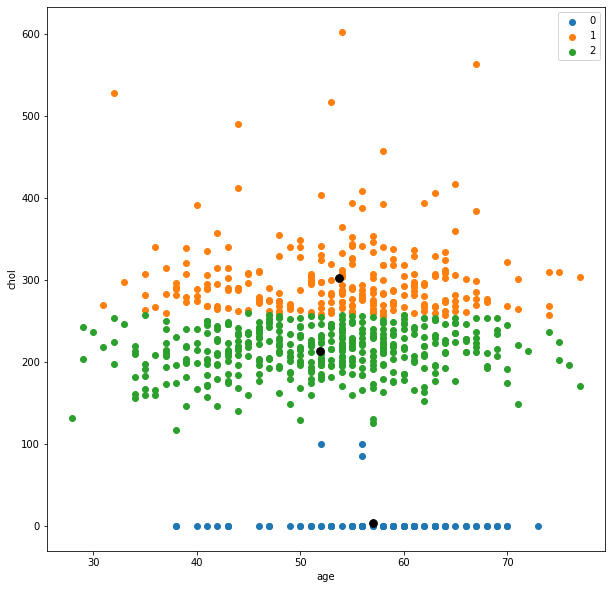

In [ ]:
#Getting the Centroids
unique_labels = np.unique(y_predicted)

#plotting the results:
plt.figure(figsize=(10,10))

for i in unique_labels:
    plt.scatter(X[y_predicted == i , 0] , X[y_predicted == i , 4] ,cmap='rainbow' ,label = i)
plt.scatter(centroids[:,0] , centroids[:,4] , s = 60, color = 'k' )
plt.legend()
plt.xlabel('age')
plt.ylabel('chol')
plt.show()

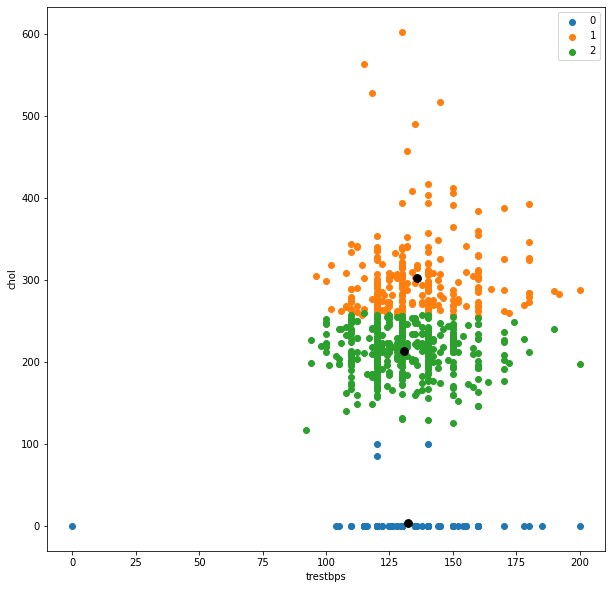

In [ ]:
#plotting the results:
plt.figure(figsize=(10,10))

for i in unique_labels:
    plt.scatter(X[y_predicted == i , 3] , X[y_predicted == i , 4] ,cmap='rainbow' ,label = i)
plt.scatter(centroids[:,3] , centroids[:,4] , s = 60, color = 'k' )
plt.legend()
plt.xlabel(df.columns[3])
plt.ylabel(df.columns[4])
plt.show()

In [ ]:
# Adding cluster values to the dataframe
df["cluster"] = y_predicted
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,cluster
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,2
1,67,1,0,160.0,286.0,0,0,108.0,1,1.5,1
2,67,1,0,120.0,229.0,0,0,129.0,1,2.6,2
3,37,1,2,130.0,250.0,0,1,187.0,0,3.5,2
4,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2


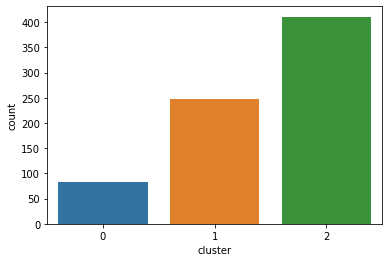

In [ ]:
# cluster sizes
sns.countplot(df['cluster']);

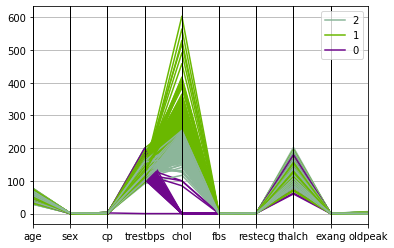

In [ ]:
from pandas.plotting import parallel_coordinates

parallel_coordinates(df, 'cluster')
plt.show()